<a href="https://colab.research.google.com/github/amdhacks/tensorflow/blob/master/income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Richer syntax highlighting

Improved support for nested languages:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```

We will be using Tensorflow to solve this challenge although we can use any ML library to perform this like sckitlearn etc.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [174]:
#Upload source files
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving state3.csv to state3 (2).csv
Saving state4.csv to state4 (2).csv
User uploaded file "state3.csv" with length 4918 bytes
User uploaded file "state4.csv" with length 2956 bytes


In [0]:
import pandas as pd
pci=pd.read_csv('./state3.csv')
gini=pd.read_csv('./state4.csv')

In [176]:
pci.columns

Index(['Unnamed: 0', 'Unnamed: 1', '1989', 'Unnamed: 3', '1979', 'Unnamed: 5',
       '1969', 'Unnamed: 7', '1959', 'Unnamed: 9'],
      dtype='object')

In [177]:
gini.columns

Index(['Unnamed: 0', 'Household', 'Unnamed: 2', 'Unnamed: 3', 'Families',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [178]:
gini.loc[0]

Unnamed: 0    State
Household      1999
Unnamed: 2     1989
Unnamed: 3     1979
Families       1999
Unnamed: 5     1989
Unnamed: 6     1979
Unnamed: 7     1969
Name: 0, dtype: object

In [0]:
#Make first row as header and then drop it
gini.columns=gini.loc[0]

In [0]:
gini.drop(0,axis=0,inplace=True)
#Drop row0 and row1 with united states data as well as do no need for this solution
gini.drop(1,axis=0,inplace=True)


In [0]:
#Drop missing values
gini.dropna(axis=0,how='any',inplace=True)

**Pre-Processing**

In [0]:
#Capture Per Capita pci.head(4)

In [0]:
#Drop row 0 and 1
pci.drop([0,1],axis=0,inplace=True)

In [0]:
pci.dropna(axis=0,how='any',thresh=3,inplace=True)

In [0]:
#Merge pci data for year-1999,1989,1979
pci_data1=pci['Unnamed: 1'].append(pci['Unnamed: 3'].append(pci['Unnamed: 5']))

In [0]:
gini.columns=['State', '1999', '1989', '1979', 1999.0, 1989.0, 1979.0, 1969.0]

In [186]:
gini[1999.0].head()

2    0.435
3    0.377
4    0.429
5    0.422
6    0.458
Name: 1999.0, dtype: float64

In [0]:
gini_data1=gini['1999'].append(gini['1989'].append(gini['1979']))

In [0]:
gini_data1=gini_data1.reset_index(drop=True)
pci_data1=pci_data1.reset_index(drop=True)

In [0]:
#Lets map the two pandas series
gini_pci_data=pd.DataFrame({'gini':gini_data1,'pci':pci_data1})


In [192]:
gini_pci_data.head

<bound method NDFrame.head of       gini    pci
0    0.475  18189
1    0.402  22660
2    0.450  20275
3    0.458  16904
4    0.475  22711
..     ...    ...
148  0.399  15906
149  0.388  17172
150  0.406  13062
151  0.381  15406
152  0.372  16861

[153 rows x 2 columns]>

In [0]:
gini_pci_data['pci']=gini_pci_data['pci'].apply(lambda x:x.replace(',',''))

In [0]:
#Shuffle data set
from sklearn.utils import shuffle
dataset = shuffle(gini_pci_data)

In [194]:
dataset.head()

,gini,pci
21,0.463,25952
141,0.397,14670
100,0.402,17230
40,0.454,18795
24,0.478,15853


In [0]:
#Create dataset for training and teting
x_train=dataset['gini'].head(120)
y_train=dataset['pci'].head(120)

In [0]:
y_test= dataset['gini'].tail(33)
y_test=dataset['pci'].tail(33)

In [205]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(x_train, y_train, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([.545]))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[21456.389]]
These are the l0 variables: [array([[ 18.986511, -18.088537, -17.204191, -18.683893]], dtype=float32), array([ 2.9380996, -2.9543357, -2.2686527, -2.3395836], dtype=float32)]
These are the l1 variables: [array([[ 10.168215 ,  10.224912 , -10.71942  , -10.729943 ],
       [ -9.383991 , -10.160111 ,  10.32835  ,  10.253879 ],
       [ -9.685414 ,  -9.877822 ,   9.730387 ,   9.546887 ],
       [-10.2226925, -10.650332 ,  10.433434 ,  10.713628 ]],
      dtype=float32), array([ 4.0419126,  4.1566386, -4.3144917, -4.3145394], dtype=float32)]
These are the l2 variables: [array([[  9.826004],
       [ 10.071523],
       [-10.511929],
       [-11.108648]], dtype=float32), array([4.684829], dtype=float32)]


Our source data is ready now and we can use regression model

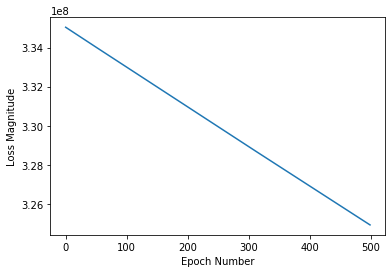

In [201]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [206]:
#Use the model to predict
print(model.predict([.345]))

[[15279.435]]


In [0]:
 #Graphic display
    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()